# MLOps Exercise: Medical Image Classification with Chest X-Ray Images

## Introduction

In this exercise, you'll gain practical experience with MLOps (Machine Learning Operations) by working on a real-world problem: classifying chest X-ray images to diagnose pneumonia. You'll go through various stages, from data cleaning to deployment, learning how to manage an end-to-end machine learning pipeline.

### Prerequisites

- Basic understanding of Python
- Familiarity with machine learning concepts
- Experience with Jupyter Notebooks

### Tools and Libraries

- Python
- NumPy
- OpenCV
- TensorFlow/Keras
- scikit-learn
- Flask
- Matplotlib
- imbalanced-learn

These libraries should cover most requirements for this exercise, including data manipulation (NumPy, pandas), visualization (Matplotlib), machine learning (scikit-learn, TensorFlow), image processing (OpenCV), and class imbalance treatment (imbalanced-learn).

### Table of Contents

1. [Data Loading and Cleaning](#Data-Loading-and-Cleaning)
2. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
3. [Class Imbalance](#Class-Imbalance)
4. [Model Building](#Model-Building)
5. [Data Augmentation](#Data-Augmentation)
6. [Model Evaluation](#Model-Evaluation)
7. [Model Deployment (Bonus)](#Model-Deployment-(Bonus))


## Environment Setup

Before we begin, let's set up the environment. We'll install the necessary Python packages for this exercise.

```bash
pip install numpy pandas opencv-python matplotlib scikit-learn tensorflow flask
```

You can also create a `requirements.txt` file with the above packages and install them using `pip install -r requirements.txt`.
Be aware that you should download ipykernel and export your env to the jupyter notebook.
```bash
python -m ipykernel install --user --name=my_new_env
```

## Data Loading and Cleaning

### Objective

Load the dataset and clean it by removing corrupted images.

### Guidance

1. Download the Chest X-Ray Images (Pneumonia) dataset and place it in a directory accessible by this notebook. From https://ametice.univ-amu.fr
2. Unzip the dataset and explore its directory structure.
3. Load the images and labels for training.
4. Write a function to scan for and remove any corrupted or invalid images.

### Exercise

Now, load the dataset use the zipfile library and clean it by removing corrupted images. Write your code in the cell below.

```python
import zipfile

zip_file_path = 'path/to/your/zip/file.zip'
extract_path = 'path/to/extract/folder'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
```

After extracting, your dataset should have the following folder structure:

```
/
|-- test/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- train/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- val/
    |-- NORMAL/
    |-- PNEUMONIA/
```

You can point `train_path` and `test_path` to the `train` and `test` folders inside this extracted directory

In [2]:
import zipfile

zip_file_path = 'Dataset.zip'
extract_path = 'Datasets'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


## Exploratory Data Analysis (EDA)

### Objective

Understand the dataset's basic statistics and visualize the data.

### Guidance

1. Use matplotlib to visualize some sample images from each class.
2. Investigate the distribution of classes (Pneumonia/Normal).

### Exercise

Perform exploratory data analysis on the dataset. Write your code in the cell below.


**Importer les bibliothèque**

In [26]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from PIL import Image
import tensorflow as tf


**Nettoyer la base de données**

In [28]:
dataset_dir= "Datasets/chest_xray"
print ("contents of the main dataset_directory")
print(os.listdir(dataset_dir))
print ("contents of the subdirectory train")
print(os.listdir(os.path.join(dataset_dir,'train')))
print ("contents of the subdirectory test")
print(os.listdir(os.path.join(dataset_dir,'test')))

contents of the main dataset_directory
['chest_xray', 'test', 'train', 'val']
contents of the subdirectory train
['NORMAL', 'PNEUMONIA']
contents of the subdirectory test
['NORMAL', 'PNEUMONIA']


In [27]:
import os
import cv2

data_dir = 'Datasets/chest_xray'


def load_and_clean_images(directory, target_size):
    images = []
    labels = []
    
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for filename in os.listdir(label_dir):
                filepath = os.path.join(label_dir, filename)
        
                img = cv2.imread(filepath)
  
                if img is not None:
         
                    img = cv2.resize(img, target_size)
                    images.append(img)
                    labels.append(label)
    
    return images, labels

target_size = (224, 224)

train_images, train_labels = load_and_clean_images(os.path.join(data_dir, 'train'), target_size)


val_images, val_labels = load_and_clean_images(os.path.join(data_dir, 'val'), target_size)


test_images, test_labels = load_and_clean_images(os.path.join(data_dir, 'test'), target_size)


clean_data_dir = 'Datasets/cleaned_data'
os.makedirs(clean_data_dir, exist_ok=True)


for i, image in enumerate(train_images):
    label = train_labels[i]
    subfolder_path = os.path.join(clean_data_dir, label)
    os.makedirs(subfolder_path, exist_ok=True)
    filename = f'{i}.jpg'
    filepath = os.path.join(subfolder_path, filename)
    cv2.imwrite(filepath, image)


for i, image in enumerate(val_images):
    label = val_labels[i]
    subfolder_path = os.path.join(clean_data_dir, label)
    os.makedirs(subfolder_path, exist_ok=True)
    filename = f'{i}.jpg' 
    filepath = os.path.join(subfolder_path, filename)
    cv2.imwrite(filepath, image)

for i, image in enumerate(test_images):
    label = test_labels[i]
    subfolder_path = os.path.join(clean_data_dir, label)
    os.makedirs(subfolder_path, exist_ok=True)
    filename = f'{i}.jpg'
    filepath = os.path.join(subfolder_path, filename)
    cv2.imwrite(filepath, image)


In [28]:
import pandas as pd
from sklearn.utils import shuffle


extract_path = 'Datasets/cleaned_data'


image_paths = []
labels = []

for folder_name in os.listdir(extract_path):
    folder_path = os.path.join(extract_path, folder_name)
    if os.path.isdir(folder_path):
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            image_paths.append(image_path)
            labels.append(folder_name)


data = pd.DataFrame({'image_path': image_paths, 'label': labels})



data = shuffle(data)

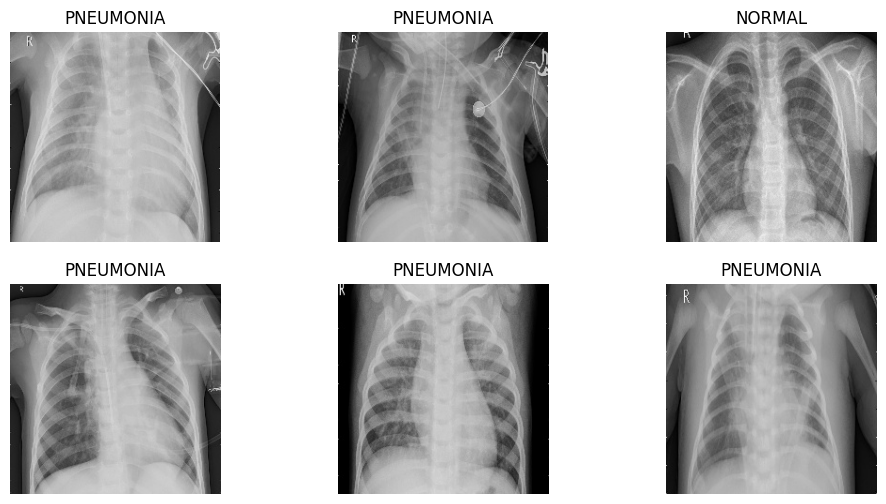

In [29]:

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    sample_image = plt.imread(data['image_path'].iloc[i])
    plt.imshow(sample_image)
    plt.title(data['label'].iloc[i])
    plt.axis('off')

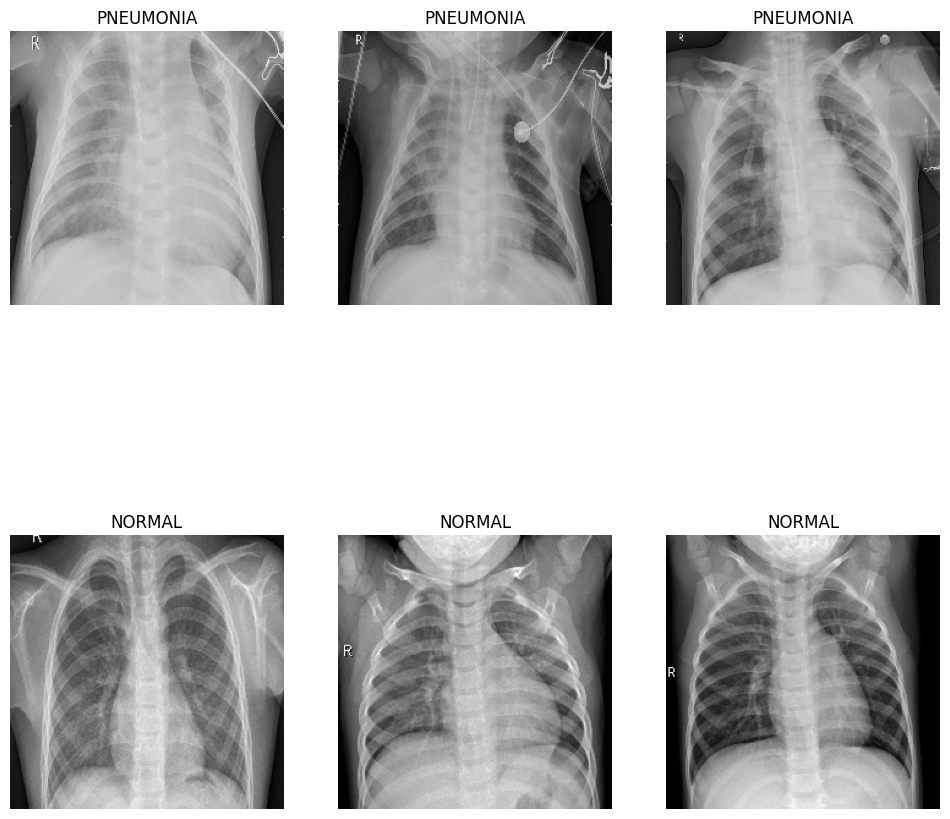

In [30]:

classes = data['label'].unique()
plt.figure(figsize=(12, 6 * len(classes)))
for i, class_name in enumerate(classes):
    class_images = data[data['label'] == class_name]['image_path'].tolist()[:3]  # Prendre les 3 premières images de chaque classe
    for j, image_path in enumerate(class_images):
        plt.subplot(len(classes), 3, i * 3 + j + 1)
        sample_image = plt.imread(image_path)
        plt.imshow(sample_image)
        plt.title(class_name)
        plt.axis('off')


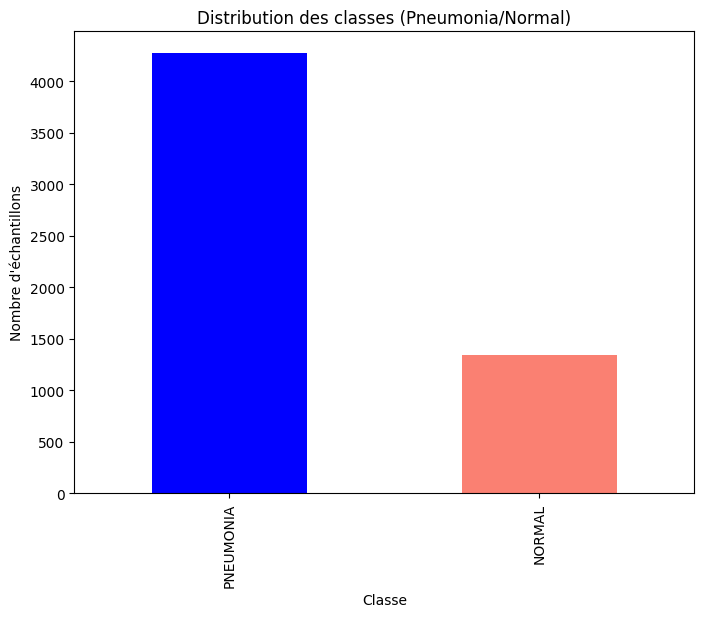

In [32]:

plt.figure(figsize=(8, 6))
data['label'].value_counts().plot(kind='bar', color=['blue', 'salmon'])
plt.title('Distribution des classes (Pneumonia/Normal)')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')

plt.show()

## Class Imbalance

### Objective

Understand how class imbalance affects model performance and learn ways to mitigate it.

### Guidance

1. Train a baseline model without accounting for class imbalance.
2. Evaluate its performance using metrics like accuracy, precision, recall, and F1-score.
3. Experiment with techniques like class weighting or oversampling methods like SMOTE to balance the classes.

### Exercise

Address the class imbalance and evaluate the impact on the model. Write your code in the cell below.


In [36]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


data_dir = 'Datasets/cleaned_data'


input_shape = (224, 224, 3)


datagen = ImageDataGenerator(
    rescale=1.0/255.0,  
    validation_split=0.2  
)


train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='binary',  
    subset='training'  
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='binary',
    subset='validation'  
)

# modèle CNN 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  

# Compiler 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=5,  
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32
)


model.save('cnn_model_1.h5')




Found 4492 images belonging to 2 classes.
Found 1122 images belonging to 2 classes.
Epoch 1/5
140/140 [==============================] - 240s 2s/step - loss: 0.3938 - accuracy: 0.8379 - val_loss: 0.2410 - val_accuracy: 0.9009
Epoch 2/5
140/140 [==============================] - 243s 2s/step - loss: 0.2000 - accuracy: 0.9256 - val_loss: 0.1486 - val_accuracy: 0.9500
Epoch 3/5
140/140 [==============================] - 235s 2s/step - loss: 0.1619 - accuracy: 0.9390 - val_loss: 0.1288 - val_accuracy: 0.9482
Epoch 4/5
140/140 [==============================] - 238s 2s/step - loss: 0.1266 - accuracy: 0.9511 - val_loss: 0.1148 - val_accuracy: 0.9545
Epoch 5/5
140/140 [==============================] - 259s 2s/step - loss: 0.1085 - accuracy: 0.9572 - val_loss: 0.1253 - val_accuracy: 0.9473


C:\Users\HP\.conda\envs\Tp01\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def evaluate_model(model, test_generator):

    y_pred = model.predict(test_generator)


    y_pred_classes = (y_pred > 0.5).astype(int)


    y_true = test_generator.classes

    cm = confusion_matrix(y_true, y_pred_classes)
    print("Matrice de Confusion:")
    print(cm)

    cr = classification_report(y_true, y_pred_classes, target_names=['Normal', 'Pneumonia'])
    print("Rapport de Classification:")
    print(cr)

 
    accuracy = accuracy_score(y_true, y_pred_classes)
    print("Accuracy:", accuracy)


test_directory = 'Datasets/chest_xray/test'
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

evaluate_model(model, test_generator)

Found 624 images belonging to 2 classes.
20/20 [==============================] - 12s 566ms/step
Matrice de Confusion:
[[ 55 179]
 [112 278]]
Rapport de Classification:
              precision    recall  f1-score   support

      Normal       0.33      0.24      0.27       234
   Pneumonia       0.61      0.71      0.66       390

    accuracy                           0.53       624
   macro avg       0.47      0.47      0.47       624
weighted avg       0.50      0.53      0.51       624

Accuracy: 0.5336538461538461


10/10 [==============================] - 5s 413ms/step


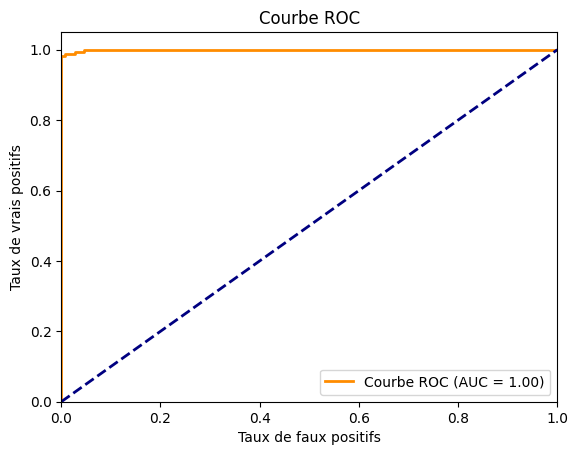

In [109]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


model = tf.keras.models.load_model('cnn_model_1.h5')


val_images, val_labels = [], []
for _ in range(val_generator.samples // val_generator.batch_size):
    images, labels = val_generator.next()
    val_images.extend(images)
    val_labels.extend(labels)

val_images = np.array(val_images)
val_labels = np.array(val_labels)


predicted_probabilities = model.predict(val_images)


fpr, tpr, _ = roc_curve(val_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


## Model Building

### Objective

Build and train a deep learning model for image classification.

### Guidance

1. Use a Convolutional Neural Network (CNN) for this task.
2. Experiment with different architectures and hyperparameters.

### Exercise

Build and train your model. Write your code in the cell below.

## Data Augmentation

### Objective

Improve your model's performance by using data augmentation techniques.

### Guidance

1. Apply data augmentation techniques like rotation, flipping, and zooming to generate more training data.
2. Retrain your model using the augmented dataset.

### Exercise

Apply data augmentation techniques and evaluate the impact on the model. Write your code in the cell below.


In [99]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def sous_echantillonnage(path, pourcentage):
    cont = 0
    for image in os.listdir(path):
        cont = cont + 1

    nombre_a_supprime = round(pourcentage * cont)

    cont = 1
    for image in os.listdir(path):
        filepath = os.path.join(path, image)
        os.remove(filepath)
        if (cont == nombre_a_supprime):
            break

        cont = cont + 1



sous_echantillonnage("Datasets/cleaned_data/PNEUMONIA", 0.4)


data_dir = 'Datasets/cleaned_data'


input_shape = (224, 224, 3)


datagen = ImageDataGenerator(
    rescale=1.0/255.0,  
    validation_split=0.2  
)


train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='binary',  
    subset='training'  
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='binary',
    subset='validation'  
)

Found 1383 images belonging to 2 classes.
Found 345 images belonging to 2 classes.


In [44]:
# modèle CNN 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  

# Compiler 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,  
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32
)


model.save('pneumonia_detection_model_2.h5')

Epoch 1/10
58/58 [==============================] - 102s 2s/step - loss: 0.6056 - accuracy: 0.7146 - val_loss: 0.3417 - val_accuracy: 0.8571
Epoch 2/10
58/58 [==============================] - 100s 2s/step - loss: 0.2533 - accuracy: 0.9056 - val_loss: 0.1659 - val_accuracy: 0.9308
Epoch 3/10
58/58 [==============================] - 99s 2s/step - loss: 0.2134 - accuracy: 0.9273 - val_loss: 0.1749 - val_accuracy: 0.9308
Epoch 4/10
58/58 [==============================] - 101s 2s/step - loss: 0.1505 - accuracy: 0.9485 - val_loss: 0.1386 - val_accuracy: 0.9375
Epoch 5/10
58/58 [==============================] - 100s 2s/step - loss: 0.1240 - accuracy: 0.9571 - val_loss: 0.1436 - val_accuracy: 0.9442
Epoch 6/10
58/58 [==============================] - 98s 2s/step - loss: 0.1148 - accuracy: 0.9609 - val_loss: 0.1434 - val_accuracy: 0.9397
Epoch 7/10
58/58 [==============================] - 98s 2s/step - loss: 0.0963 - accuracy: 0.9615 - val_loss: 0.2308 - val_accuracy: 0.9308
Epoch 8/10
58/58

C:\Users\HP\.conda\envs\Tp01\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model Evaluation

### Objective

Evaluate your model's performance using different metrics and visualization tools.

### Guidance

1. Use metrics like accuracy, precision, recall, and F1-score for evaluation.
2. Plot confusion matrices and ROC curves to visualize your model's performance.

### Exercise

Evaluate your model and interpret the results. Write your code in the cell below.


In [46]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def evaluate_model(model, test_generator):

    y_pred = model.predict(test_generator)

    y_pred_classes = (y_pred > 0.5).astype(int)

    y_true = test_generator.classes

    cm = confusion_matrix(y_true, y_pred_classes)
    print("Matrice de Confusion:")
    print(cm)

    cr = classification_report(y_true, y_pred_classes, target_names=['Normal', 'Pneumonia'])
    print("Rapport de Classification:")
    print(cr)

   
test_directory = 'Datasets/chest_xray/test'
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

evaluate_model(model, test_generator)

Found 624 images belonging to 2 classes.
20/20 [==============================] - 12s 603ms/step
Matrice de Confusion:
[[ 27 207]
 [ 65 325]]
Rapport de Classification:
              precision    recall  f1-score   support

      Normal       0.29      0.12      0.17       234
   Pneumonia       0.61      0.83      0.70       390

    accuracy                           0.56       624
   macro avg       0.45      0.47      0.44       624
weighted avg       0.49      0.56      0.50       624



## Model Deployment (Bonus)

### Objective

Learn the basics of deploying a machine learning model.

### Guidance

1. Save your trained model.
2. Use Flask to create a simple REST API to serve your model.

### Exercise

Deploy your model using Flask. Write your code in the cell below.


In [1]:
pip install flask

  Obtaining dependency information for flask from https://files.pythonhosted.org/packages/36/42/015c23096649b908c809c69388a805a571a3bea44362fe87e33fc3afa01f/flask-3.0.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/133.1 kB ? eta -:--:--
     --- ------------------------------------ 10.2/133.1 kB ? eta -:--:--
     --- ------------------------------------ 10.2/133.1 kB ? eta -:--:--
     -------- ---------------------------- 30.7/133.1 kB 217.9 kB/s eta 0:00:01
     ------------------- ----------------- 71.7/133.1 kB 393.8 kB/s eta 0:00:01
     --------------------------------- -- 122.9/133.1 kB 554.9 kB/s eta 0:00:01
     ------------------------------------ 133.1/133.1 kB 525.0 kB/s eta 0:00:00
  Obtaining dependency information for click>=8.1.3 from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for blinker>=1.6.2 from htt

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import numpy as np
import cv2

In [2]:
app = Flask(__name__)

model = load_model('pneumonia_detection_model.h5')

@app.route('/predict', methods=['POST'])

def predict():
    try:
        
        file = request.files['image']
        
        
        img = cv2.imdecode(np.frombuffer(file.read(), np.uint8), -1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        img = np.expand_dims(img, axis=0)
        img = img / 255.0  

        
        prediction = model.predict(img)

        
        pneumonia_probability = prediction[0][0] * 100
        normal_probability = (1 - prediction[0][0]) * 100

        return jsonify({'PNEUMONIA': pneumonia_probability, 'NORMAL': normal_probability})

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '_main_':
    app.run(debug=True)

In [ ]:
import requests
import json
import numpy as np
import cv2
def predict_pneumonia(image_path, api_url):
    
    img = cv2.imread(image_path)
  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    response = requests.post(api_url, files={'image': (image_path, img, 'image/jpeg')})
    prediction_data = json.loads(response.text)
   
    print("Prediction:")
    print(json.dumps(prediction_data, indent=4))

# exemple
image_path = 'C://Users//HP//Downloads//Dataset//chest_xray//chest_xray//test//IM-0001-0001.jpeg'
api_url = 'http://127.0.0.1:5000/predict'
predict_pneumonia(image_path, api_url)


### Next Steps

1. Experiment with more advanced architectures and hyperparameters.
2. Deploy your model
3. Integrate your model into a web application or other services.
4. Learn more about MLOps best practices and tools.


